In [1]:
%pylab --no-import-all notebook
from scipy.signal import savgol_filter,gaussian,savgol_coeffs
import pandas as pd
from scipy.ndimage import convolve1d
from Classification import Moving_Mean

Populating the interactive namespace from numpy and matplotlib


## S-G posledního bodu

In [9]:
def S_G(x, window_length, polyorder, pos_back = 1, deriv=0, axis=-1, mode='nearest'):
    
    if pos_back > window_length:
        raise ValueError("pozice není uvnitř okna")
    
    #okraje mám defaulte pomocí nearest => nakopíruje krajní body
    if mode not in ["mirror", "nearest", "wrap"]:
        raise ValueError("mode must be 'mirror', 'nearest' or 'wrap'")

    x = np.asarray(x)
    # Nastavli jsem, aby se koeficienty počítaly v posledním bodě -> pos = window_lenght-1
    coeffs = savgol_coeffs(window_length, polyorder, pos = window_length - pos_back, deriv=deriv)
    # dále používám stejnou konvoluci jako je v originále
    y = convolve1d(x, coeffs, axis=axis, mode=mode, cval=0.0)

    return y

## testovat budu třeba na gaussovce

<IPython.core.display.Javascript object>


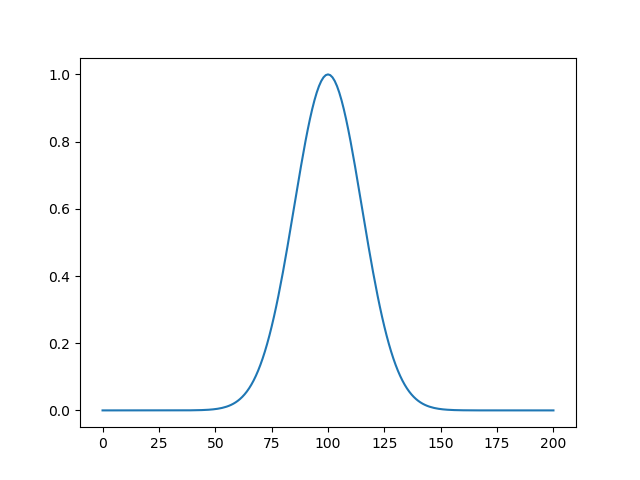

In [3]:
window = gaussian(201, std=15)
#x = np.linspace(0.0001,10,1001)
#window = np.exp(-x)
plt.figure("gauss")
plt.plot(window)
plt.show()

<IPython.core.display.Javascript object>


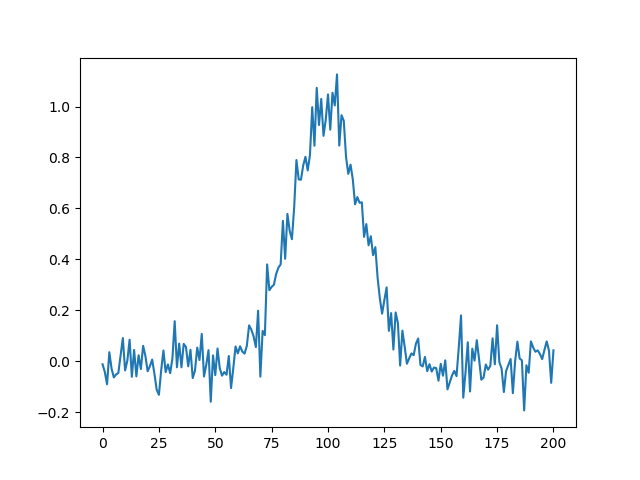

In [5]:
x = np.copy(window)
x = x + 1/15*np.random.randn(len(x))
plt.figure("gauss + noise")
plt.plot(x)
plt.show()

<IPython.core.display.Javascript object>


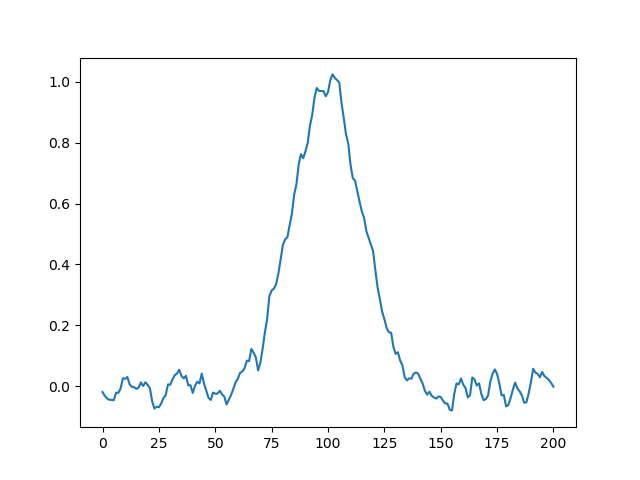

In [6]:
plt.figure("gauss + noise + standartní S-G" )
plt.plot(savgol_filter(x,9,2, deriv = 0))
plt.show()

<IPython.core.display.Javascript object>


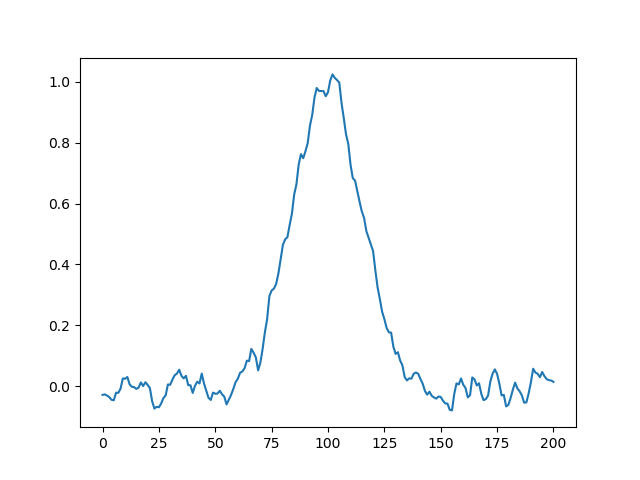

In [14]:
plt.figure("gauss + noise + modifikovaný S-G" )
plt.plot(S_G(x,9,2, pos_back = 5, deriv = 0, mode = "nearest"))
plt.show()

<IPython.core.display.Javascript object>


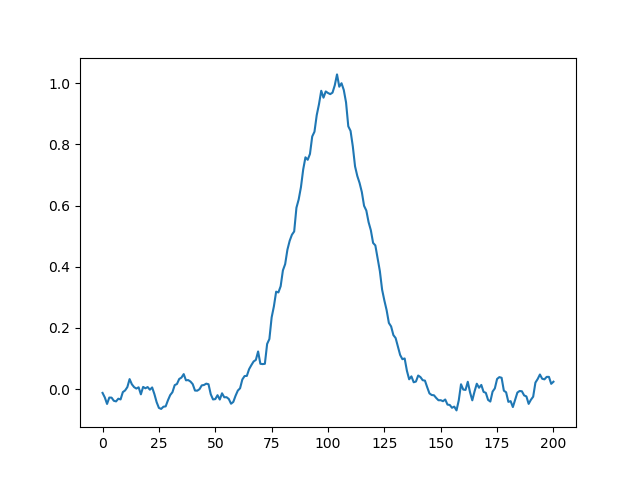

In [16]:
plt.figure("gauss + noise + Moving_Mean" )
plt.plot(Moving_Mean(x,5))
plt.show()

## Test na 1. derivaci gaussovky

<IPython.core.display.Javascript object>


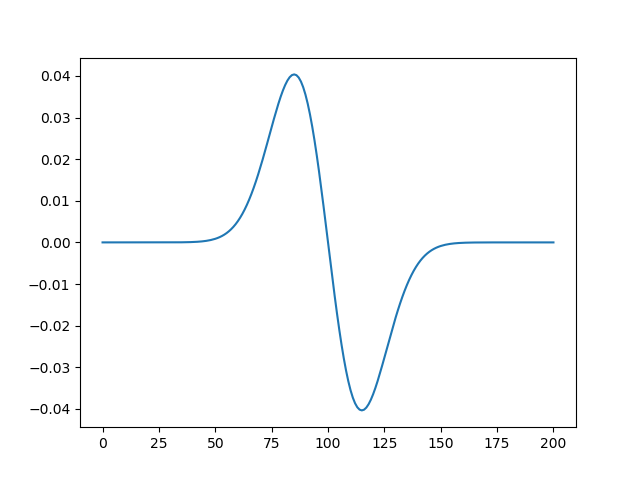

In [12]:
plt.figure("gauss 1.deriv")
plt.plot(np.gradient(window))
plt.show()

<IPython.core.display.Javascript object>


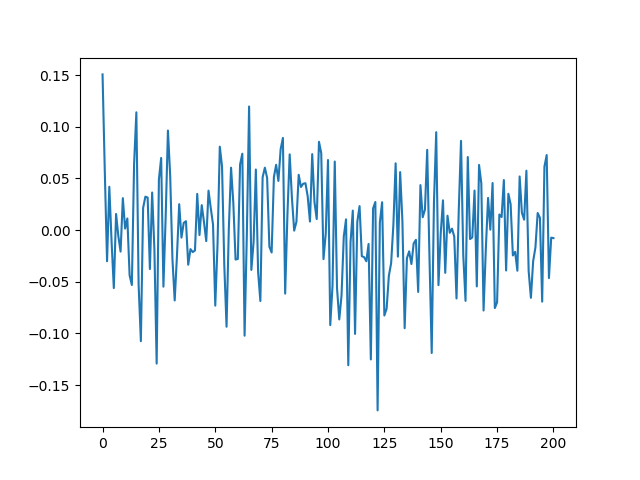

In [13]:
plt.figure("gauss 1. deriv + noise")
plt.plot(np.gradient(x))
plt.show()

<IPython.core.display.Javascript object>


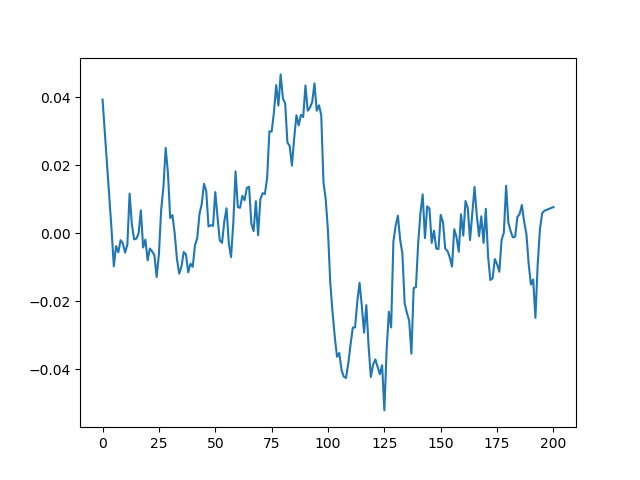

In [14]:
plt.figure("gauss 1. deriv + noise + standartní S-G" )
plt.plot(savgol_filter(x,9,2, deriv = 1))
plt.show()

<IPython.core.display.Javascript object>


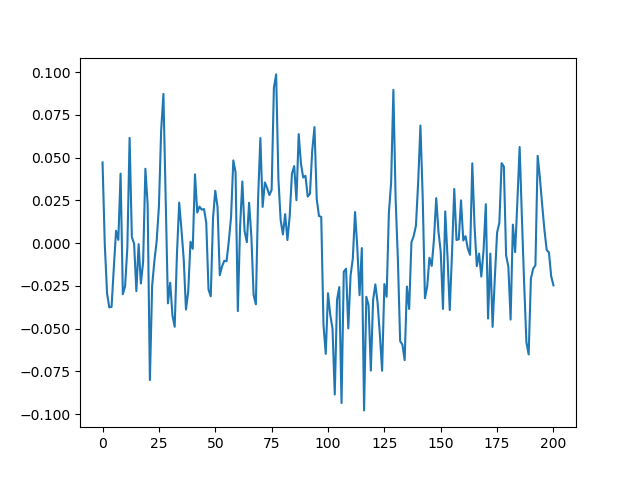

In [36]:
plt.figure("gauss 1.deriv + noise + modifikovaný S-G" )
plt.plot(S_G(x,9,2, deriv = 1, mode = "nearest"))
plt.show()

<IPython.core.display.Javascript object>


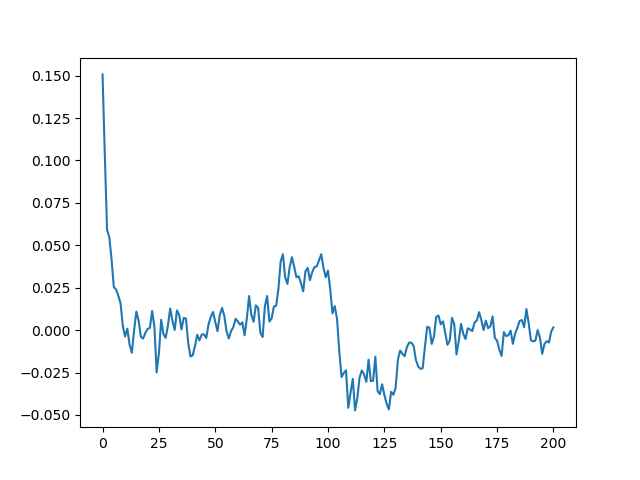

In [29]:
plt.figure("gauss 1.deriv + noise + Moving_Mean" )
plt.plot(Moving_Mean(np.gradient(x),9))
plt.show()

## Vliv posunutí počítaného bodu 

## Signál bez šumu

<IPython.core.display.Javascript object>


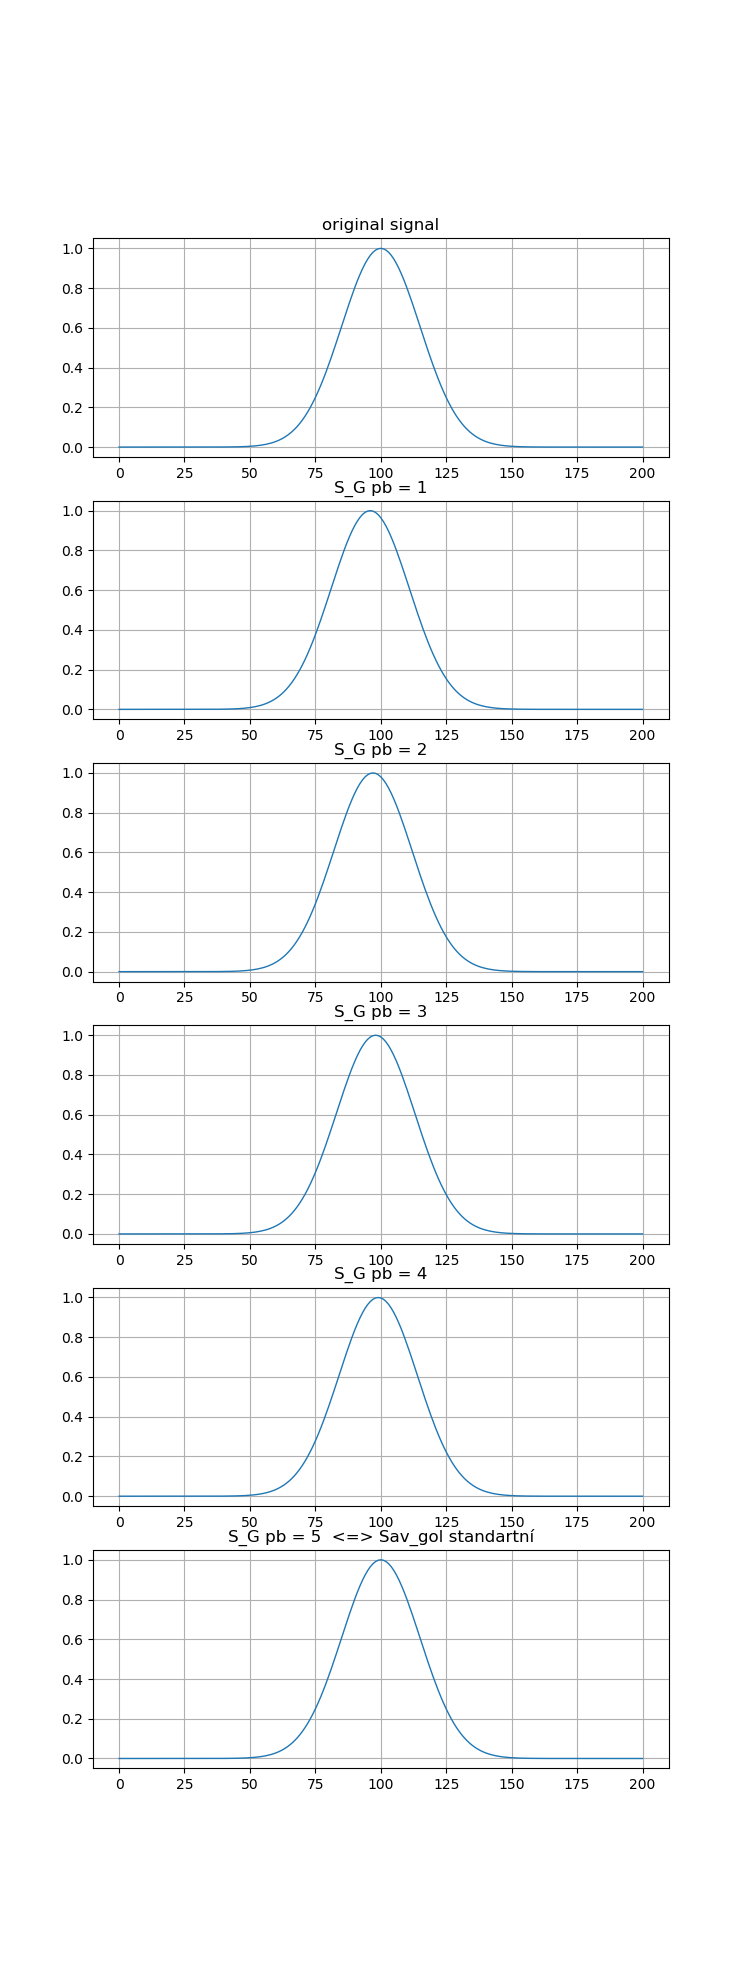

In [74]:
plt.figure("Porovnání posunu bodu výpočtu bez šumu")

plt.subplot(6, 1, 1)
plt.plot(window, '-', lw=1)
plt.title('original signal')
plt.grid(True)

plt.subplot(6, 1, 2)
plt.plot(S_G(window,9,2,pos_back = 1, deriv = 0), '-', lw=1)
plt.title('S_G pb = 1')
plt.grid(True)

plt.subplot(6, 1, 3)
plt.plot(S_G(window,9,2,pos_back = 2, deriv = 0), '-', lw=1)
plt.title('S_G pb = 2')
plt.grid(True)

plt.subplot(6, 1, 4)
plt.plot(S_G(window,9,2,pos_back = 3, deriv = 0), '-', lw=1)
plt.title('S_G pb = 3')
plt.grid(True)

plt.subplot(6, 1, 5)
plt.plot(S_G(window,9,2,pos_back = 4, deriv = 0), '-', lw=1)
plt.title('S_G pb = 4')
plt.grid(True)

plt.subplot(6, 1, 6)
plt.plot(S_G(window,9,2,pos_back = 5, deriv = 0), '-', lw=1)
plt.title('S_G pb = 5  <=> Sav_gol standartní')
plt.grid(True)

plt.show()

<IPython.core.display.Javascript object>


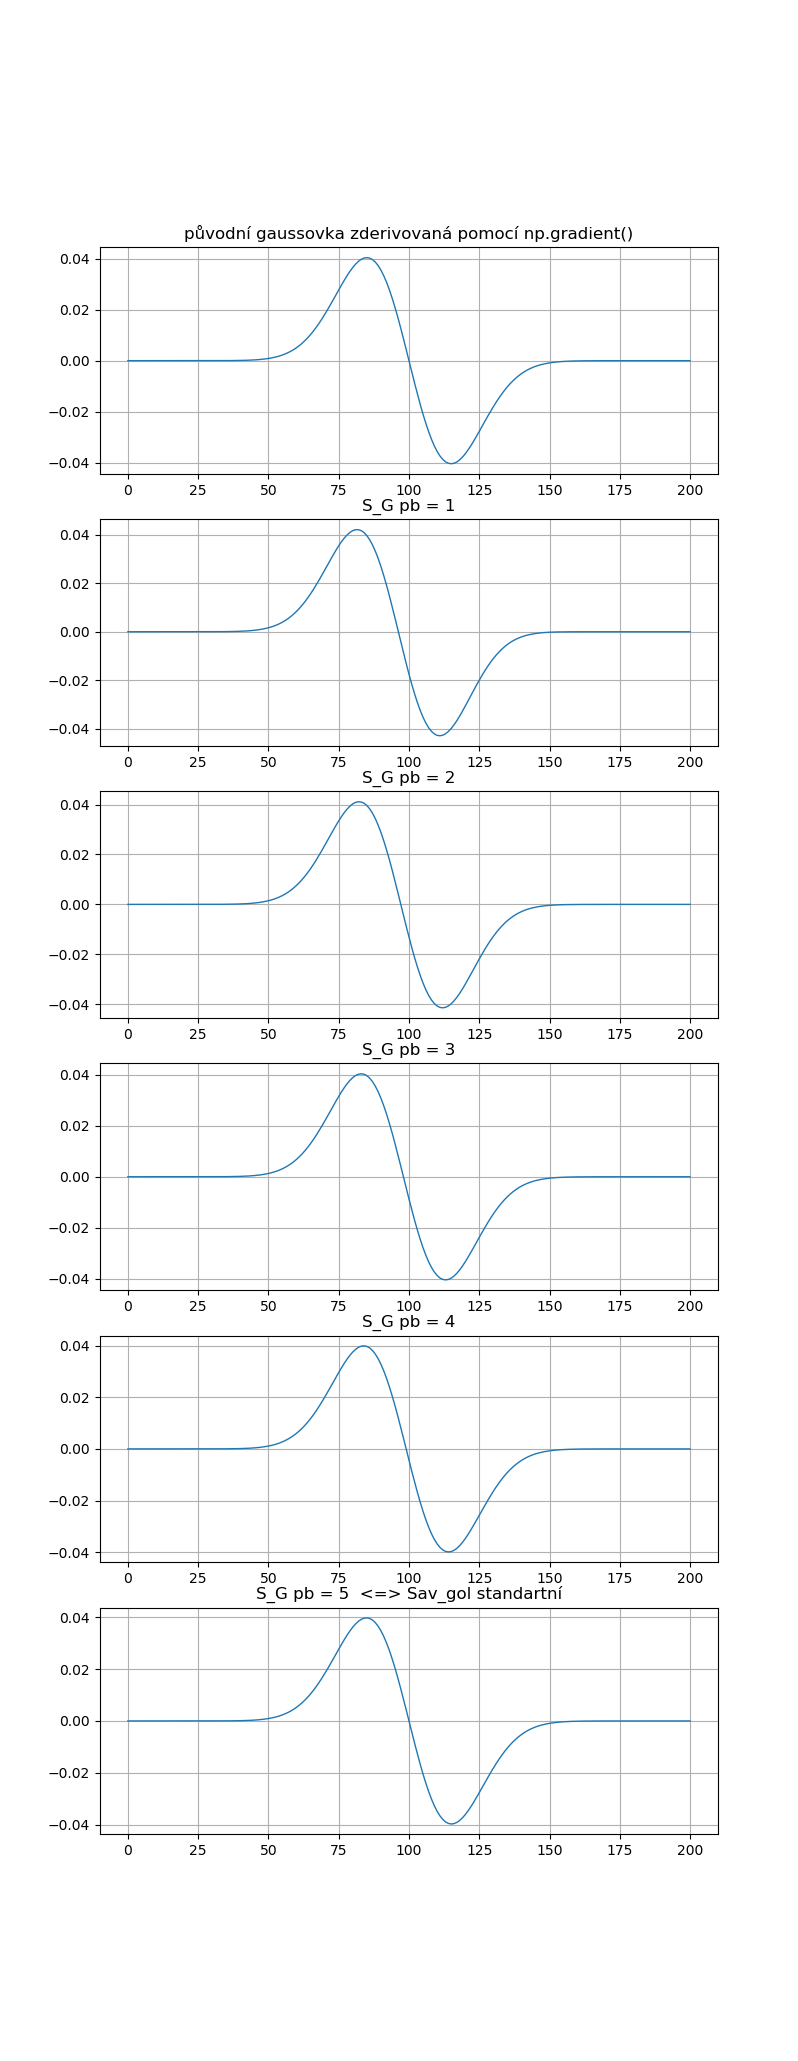

In [75]:
plt.figure("Porovnání posunu bodu výpočtu bez šumu 1 derivace")

plt.subplot(6, 1, 1)
plt.plot(np.gradient(window), '-', lw=1)
plt.title('původní gaussovka zderivovaná pomocí np.gradient()')
plt.grid(True)

plt.subplot(6, 1, 2)
plt.plot(S_G(window,9,2,pos_back = 1, deriv = 1), '-', lw=1)
plt.title('S_G pb = 1')
plt.grid(True)

plt.subplot(6, 1, 3)
plt.plot(S_G(window,9,2,pos_back = 2, deriv = 1), '-', lw=1)
plt.title('S_G pb = 2')
plt.grid(True)

plt.subplot(6, 1, 4)
plt.plot(S_G(window,9,2,pos_back = 3, deriv = 1), '-', lw=1)
plt.title('S_G pb = 3')
plt.grid(True)

plt.subplot(6, 1, 5)
plt.plot(S_G(window,9,2,pos_back = 4, deriv = 1), '-', lw=1)
plt.title('S_G pb = 4')
plt.grid(True)

plt.subplot(6, 1, 6)
plt.plot(S_G(window,9,2,pos_back = 5, deriv = 1), '-', lw=1)
plt.title('S_G pb = 5  <=> Sav_gol standartní')
plt.grid(True)

plt.show()

## Signál se šumem

<IPython.core.display.Javascript object>


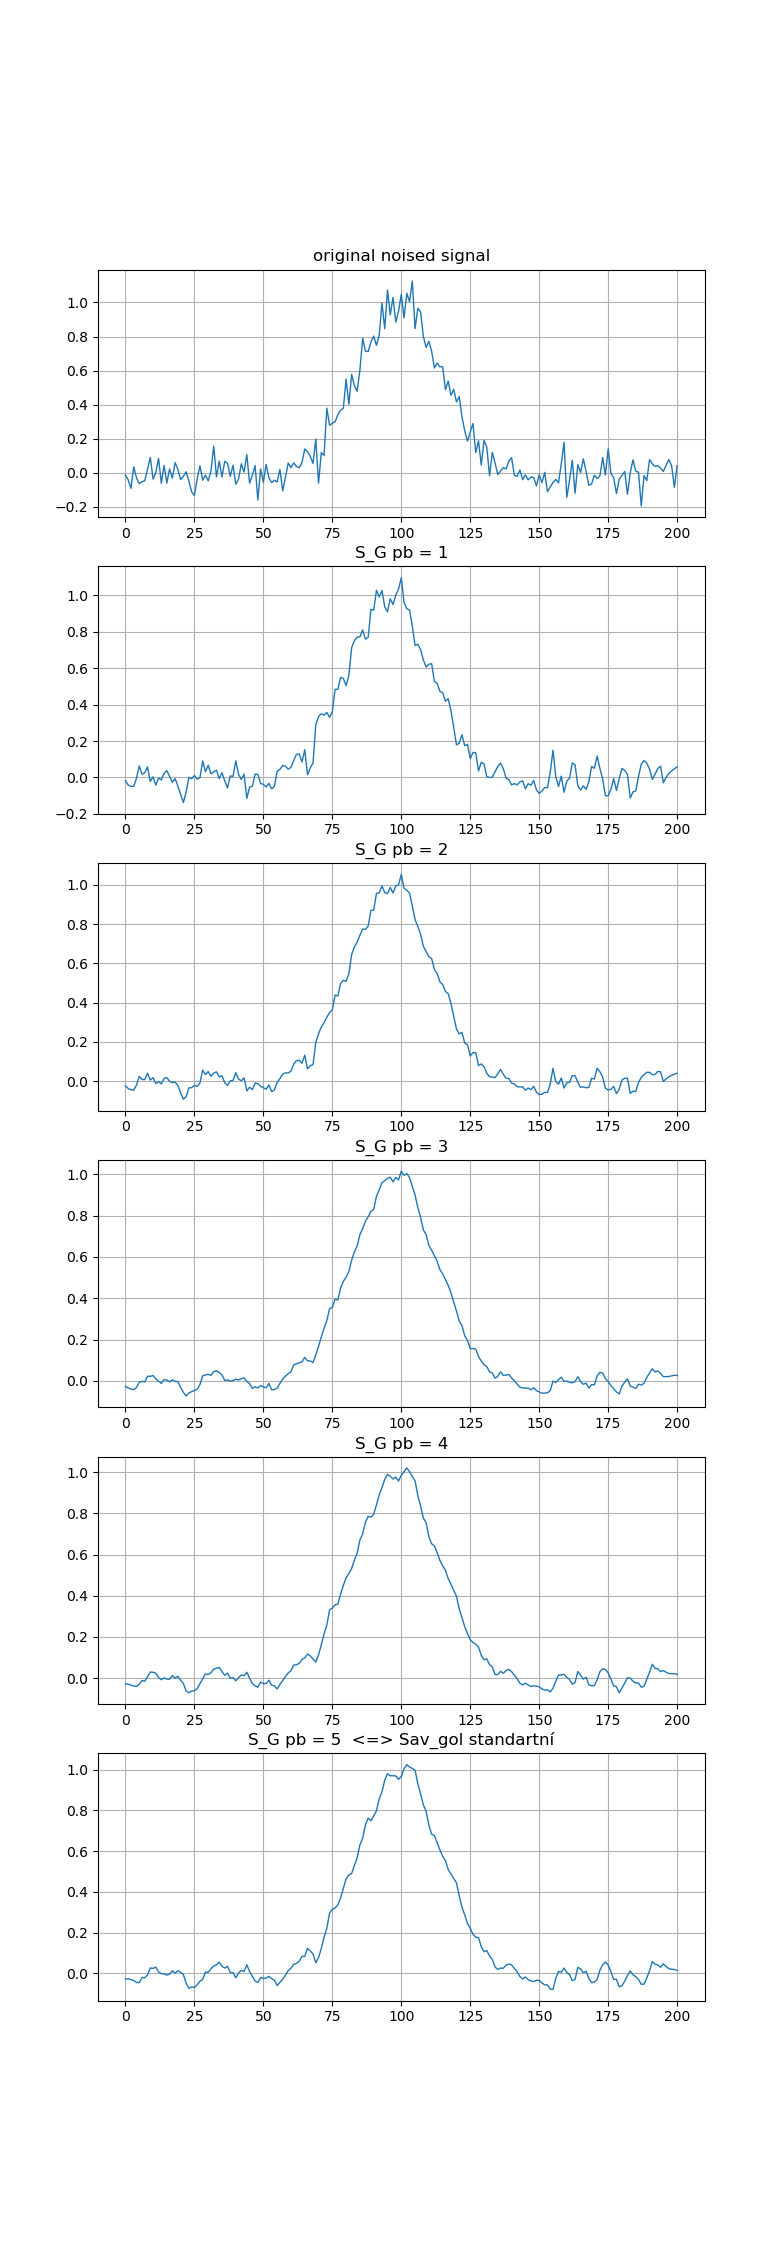

In [69]:
X = np.arange(len(x))

plt.figure("Porovnání posunu bodu výpočtu")

plt.subplot(6, 1, 1)
plt.plot(x, '-', lw=1)
plt.title('original noised signal')
plt.grid(True)

plt.subplot(6, 1, 2)
plt.plot(S_G(x,9,2,pos_back = 1, deriv = 0), '-', lw=1)
plt.title('S_G pb = 1')
plt.grid(True)

plt.subplot(6, 1, 3)
plt.plot(S_G(x,9,2,pos_back = 2, deriv = 0), '-', lw=1)
plt.title('S_G pb = 2')
plt.grid(True)

plt.subplot(6, 1, 4)
plt.plot(S_G(x,9,2,pos_back = 3, deriv = 0), '-', lw=1)
plt.title('S_G pb = 3')
plt.grid(True)

plt.subplot(6, 1, 5)
plt.plot(S_G(x,9,2,pos_back = 4, deriv = 0), '-', lw=1)
plt.title('S_G pb = 4')
plt.grid(True)

plt.subplot(6, 1, 6)
plt.plot(S_G(x,9,2,pos_back = 5, deriv = 0), '-', lw=1)
plt.title('S_G pb = 5  <=> Sav_gol standartní')
plt.grid(True)



#plt.tight_layout(pad = 0.001)
plt.show()

<IPython.core.display.Javascript object>


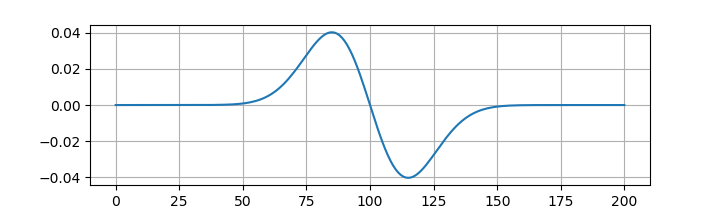

In [72]:
plt.figure("gauss 1.deriv jak by to mělo vypadat")
plt.plot(np.gradient(window))
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


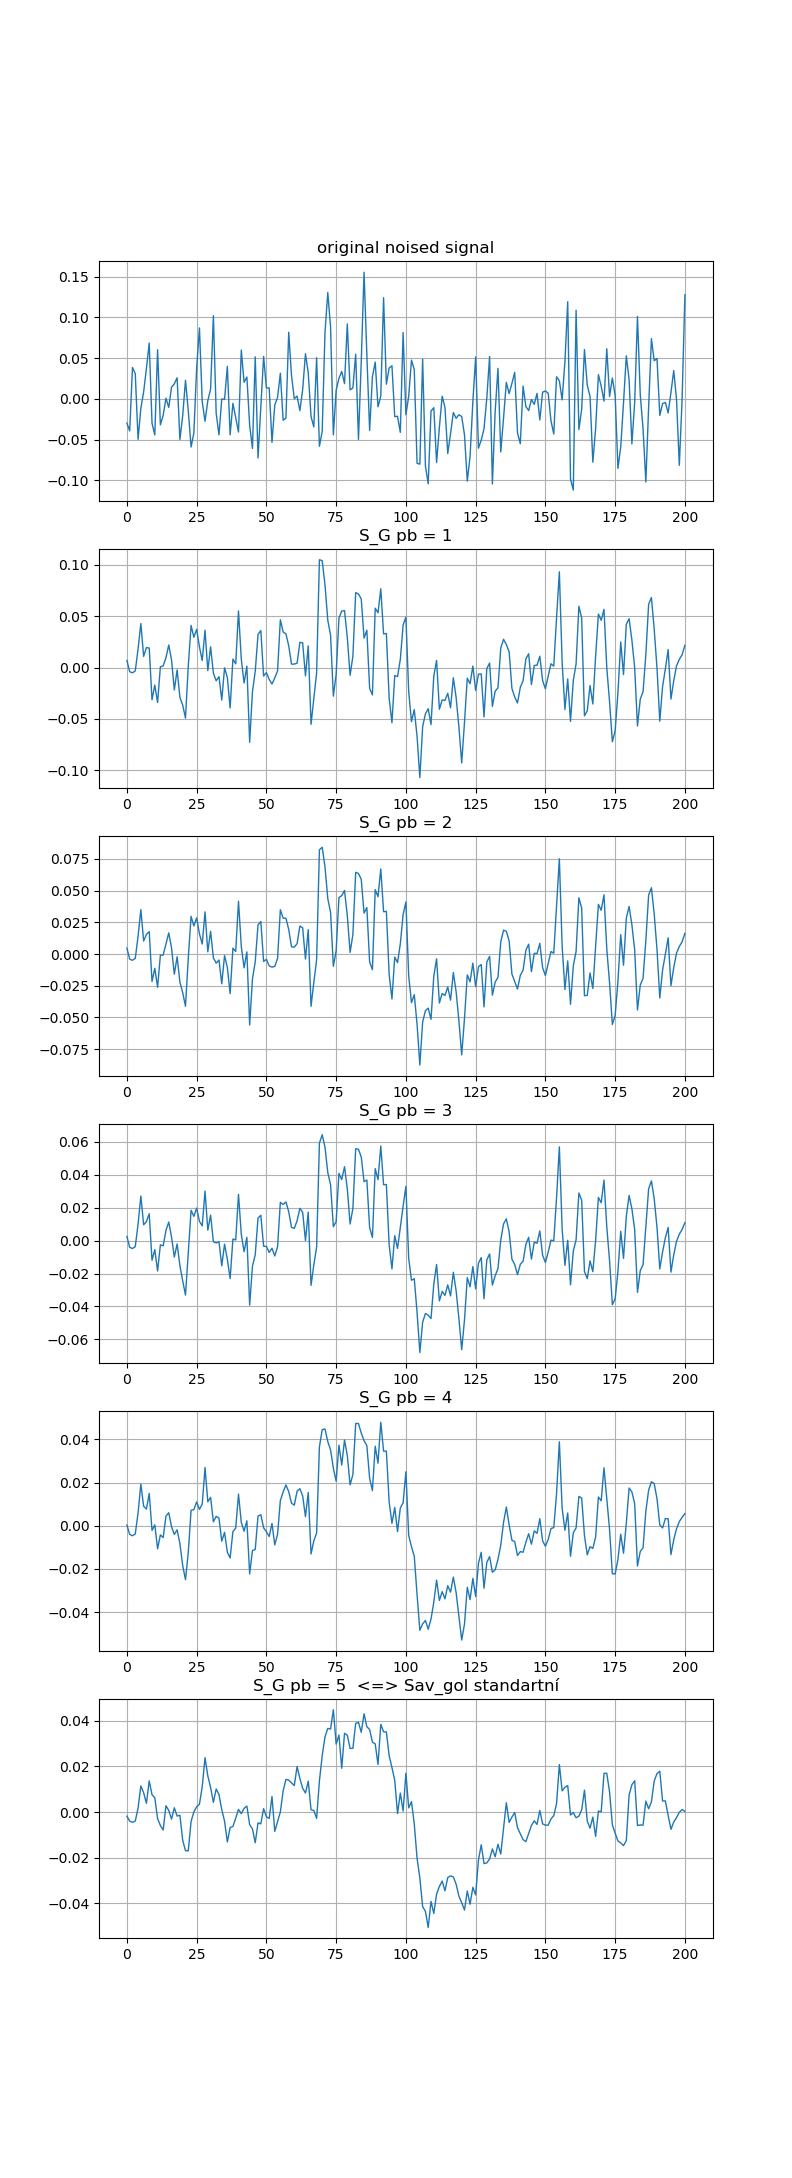

In [70]:
plt.figure("Porovnání posunu bodu výpočtu u derivace")

plt.subplot(6, 1, 1)
plt.plot(np.gradient(x), '-', lw=1)
plt.title('original noised signal')
plt.grid(True)

plt.subplot(6, 1, 2)
plt.plot(S_G(x,9,2,pos_back = 1, deriv = 1), '-', lw=1)
plt.title('S_G pb = 1')
plt.grid(True)

plt.subplot(6, 1, 3)
plt.plot(S_G(x,9,2,pos_back = 2, deriv = 1), '-', lw=1)
plt.title('S_G pb = 2')
plt.grid(True)

plt.subplot(6, 1, 4)
plt.plot(S_G(x,9,2,pos_back = 3, deriv = 1), '-', lw=1)
plt.title('S_G pb = 3')
plt.grid(True)

plt.subplot(6, 1, 5)
plt.plot(S_G(x,9,2,pos_back = 4, deriv = 1), '-', lw=1)
plt.title('S_G pb = 4')
plt.grid(True)

plt.subplot(6, 1, 6)
plt.plot(S_G(x,9,2,pos_back = 5, deriv = 1), '-', lw=1)
plt.title('S_G pb = 5  <=> Sav_gol standartní')
plt.grid(True)



#plt.tight_layout(pad = 0.001)
plt.show()